In [2]:
import numpy as np
from pycbc.waveform import get_td_waveform, get_fd_waveform, td_approximants, fd_approximants
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# Time domain

In [4]:
fd_approximants()

['EccentricFD',
 'TaylorF2',
 'TaylorF2Ecc',
 'TaylorF2NLTides',
 'TaylorF2RedSpin',
 'TaylorF2RedSpinTidal',
 'SpinTaylorF2',
 'EOBNRv2_ROM',
 'EOBNRv2HM_ROM',
 'SEOBNRv1_ROM_EffectiveSpin',
 'SEOBNRv1_ROM_DoubleSpin',
 'SEOBNRv2_ROM_EffectiveSpin',
 'SEOBNRv2_ROM_DoubleSpin',
 'SEOBNRv2_ROM_DoubleSpin_HI',
 'Lackey_Tidal_2013_SEOBNRv2_ROM',
 'SEOBNRv4_ROM',
 'SEOBNRv4HM_ROM',
 'SEOBNRv4_ROM_NRTidal',
 'SEOBNRv4_ROM_NRTidalv2',
 'SEOBNRv4_ROM_NRTidalv2_NSBH',
 'SEOBNRv4T_surrogate',
 'IMRPhenomA',
 'IMRPhenomB',
 'IMRPhenomC',
 'IMRPhenomD',
 'IMRPhenomD_NRTidal',
 'IMRPhenomD_NRTidalv2',
 'IMRPhenomNSBH',
 'IMRPhenomHM',
 'IMRPhenomP',
 'IMRPhenomPv2',
 'IMRPhenomPv2_NRTidal',
 'IMRPhenomPv2_NRTidalv2',
 'SpinTaylorT4Fourier',
 'SpinTaylorT5Fourier',
 'NRSur4d2s',
 'IMRPhenomXAS',
 'IMRPhenomXHM',
 'IMRPhenomPv3',
 'IMRPhenomPv3HM',
 'IMRPhenomXP',
 'IMRPhenomXPHM',
 'SEOBNRv5_ROM',
 'IMRPhenomXAS_NRTidalv2',
 'IMRPhenomXP_NRTidalv2',
 'IMRPhenomXO4a',
 'ExternalPython',
 'SpinTaylor

In [5]:
par = {'approximant':'SEOBNRv5E',
       'mass1':40,
       'mass2':20,
       'spin1z':0.5,
       'spin2z':0.1,
       'delta_t':1/2048,
       'inclination':np.pi/2,
       'delta_f':1/16,
       'f_lower':20,
       'eccentricity':0.2,
       'rel_anomaly':1}

In [6]:
hp, hc = get_td_waveform(**par)

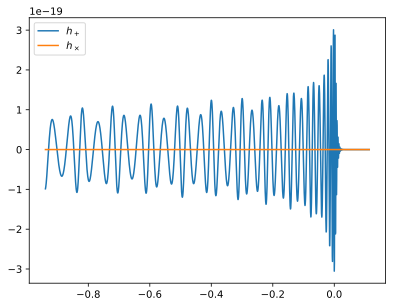

In [7]:
plt.plot(hp.sample_times,hp,label='$h_+$')
plt.plot(hc.sample_times,hc,label='$h_\\times$')
plt.legend()

# Frequency domain

In [9]:
from pycbc.waveform.waveform import seobnrv5_length_in_time

In [11]:
seobnrv5_length_in_time(**par)

XLAL Error - ROM_check_version_number (./LALSimIMRSEOBNRROMUtilities.c:402): Expected ROM data version 1.0.0, but got version 0.0.0.
XLAL Error - ROM_check_version_number (./LALSimIMRSEOBNRROMUtilities.c:402): I/O error


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 seobnrv5_length_in_time(**par)                                                               │
│   2                                                                                              │
│                                                                                                  │
│ /Users/yifanwang/miniconda3/lib/python3.11/site-packages/pycbc/waveform/waveform.py:1036 in      │
│ seobnrv5_length_in_time                                                                          │
│                                                                                                  │
│   1033 def seobnrv5_length_in_time(**kwds):                                                      │
│   1034 │   """Stub for holding the calculation of SEOBNRv5_ROM waveform duration.                │
│   1035 │   """                                                                                   │
│ ❱ 1036 │   return get_imr_length("SEOBNRv5_ROM", **kwds)                                         │
│   1037                                                                                           │
│   1038 def imrphenomd_length_in_time(**kwds):                                                    │
│   1039 │   """Stub for holding the calculation of IMRPhenomD waveform duration.                  │
│                                                                                                  │
│ /Users/yifanwang/miniconda3/lib/python3.11/site-packages/pycbc/waveform/waveform.py:1021 in      │
│ get_imr_length                                                                                   │
│                                                                                                  │
│   1018 │   s2z = float(kwds['spin2z'])                                                           │
│   1019 │   f_low = float(kwds['f_lower'])                                                        │
│   1020 │   # 10% margin of error is incorporated in the pnutils function                         │
│ ❱ 1021 │   return pnutils.get_imr_duration(m1, m2, s1z, s2z, f_low, approximant=approx)          │
│   1022                                                                                           │
│   1023 def seobnrv2_length_in_time(**kwds):                                                      │
│   1024 │   """Stub for holding the calculation of SEOBNRv2* waveform duration.                   │
│                                                                                                  │
│ /Users/yifanwang/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2372 in      │
│ __call__                                                                                         │
│                                                                                                  │
│   2369 │   │   │   self._init_stage_2(*args, **kwargs)                                           │
│   2370 │   │   │   return self                                                                   │
│   2371 │   │                                                                                     │
│ ❱ 2372 │   │   return self._call_as_normal(*args, **kwargs)                                      │
│   2373 │                                                                                         │
│   2374 │   def _get_ufunc_and_otypes(self, func, args):                                          │
│   2375 │   │   """Return (ufunc, otypes)."""                                                     │
│                                                                                                  │
│ /Users/yifanwang/miniconda3/lib/python3.11/site-packages/nu

In [8]:
hpf, hcf = get_fd_waveform(**par)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 hpf, hcf = get_fd_waveform(**par)                                                            │
│   2                                                                                              │
│                                                                                                  │
│ /Users/yifanwang/miniconda3/lib/python3.11/site-packages/pycbc/waveform/waveform.py:646 in       │
│ get_fd_waveform                                                                                  │
│                                                                                                  │
│    643 │   else:                                                                                 │
│    644 │   │   required = parameters.fd_required                                                 │
│    645 │   check_args(input_params, required)                                                    │
│ ❱  646 │   return wav_gen(**input_params)                                                        │
│    647                                                                                           │
│    648                                                                                           │
│    649 get_fd_waveform.__doc__ = get_fd_waveform.__doc__.format(                                 │
│                                                                                                  │
│ /Users/yifanwang/miniconda3/lib/python3.11/site-packages/pycbc/waveform/waveform.py:677 in       │
│ get_fd_waveform_from_td                                                                          │
│                                                                                                  │
│    674 │   full_duration = duration = get_waveform_filter_length_in_time(**params)               │
│    675 │   nparams = params.copy()                                                               │
│    676 │                                                                                         │
│ ❱  677 │   while full_duration < duration * 1.5:                                                 │
│    678 │   │   full_duration = get_waveform_filter_length_in_time(**nparams)                     │
│    679 │   │   nparams['f_lower'] -= 1                                                           │
│    680                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [6]:
hpf

In [7]:
plt.loglog(hpf.sample_frequencies,abs(hpf),label='pycbc fd')
hp_tdtofd = hp.to_frequencyseries()
plt.loglog(hp_tdtofd.sample_frequencies,abs(hp_tdtofd),label='direct fft')
plt.axvline(20,ls='--',color='black')
plt.legend()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 plt.loglog(hpf.sample_frequencies,abs(hpf),label='pycbc fd')                                 │
│   2 hp_tdtofd = hp.to_frequencyseries()                                                          │
│   3 plt.loglog(hp_tdtofd.sample_frequencies,abs(hp_tdtofd),label='direct fft')                   │
│   4 plt.axvline(20,ls='--',color='black')                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'TimeSeries' object has no attribute 'sample_frequencies'

In [ ]:
hpf.start_time

In [ ]:
hp_fdtotd = hpf.to_timeseries()

In [ ]:
plt.plot(hp_fdtotd.sample_times,hp_fdtotd,label='fd waveform then to_timeseries()')
plt.plot(hp.sample_times,hp,label='td waveform')
plt.legend()

In [ ]:
plt.plot(hp_fdtotd.sample_times,hp_fdtotd,label='fd waveform then to_timeseries()')
plt.legend()
plt.xlim(29,)

# SEOBNRv5_ROM

In [ ]:
hpf, hcf = get_fd_waveform(approximant='SEOBNRv5_ROM',
                                 mass1=30,
                                 mass2=30,
                                 spin1z=0.1,
                                 f_lower=20,
                                 delta_f = 1/32)

In [ ]:
hpf.start_time

In [ ]:
hp_t = hpf.to_timeseries()

In [ ]:
plt.plot(hp_t.sample_times,hp_t)

# checking: SEOBNRv5 Time domain again

In [ ]:
from pycbc.waveform import utils as wfutils

In [ ]:
hp, _ = get_td_waveform(approximant='SEOBNRv5E',
                                 mass1=30,
                                 mass2=30,
                                 spin1z=0.1,
                                 f_lower=20,
                                 delta_t = 1/2048,
                                 eccentricity=0.2,rel_anomaly=0)

In [ ]:
hp.duration

In [ ]:
hp.start_time

In [ ]:
tsamples = int(1.0 / (1/16) / (1/2048) )

In [ ]:
plt.plot(hp.sample_times,hp)

# Resize

In [ ]:
hp.resize(tsamples)

In [ ]:
hp.start_time

In [ ]:
hp.duration

In [ ]:
plt.plot(hp.sample_times,hp)

# Taper

In [ ]:
hp = wfutils.td_taper(hp, hp.start_time, hp.start_time + 0.5)

In [ ]:
hp.start_time

In [ ]:
plt.plot(hp.sample_times,hp)

In [ ]:
hp_f = hp.to_frequencyseries()

In [ ]:
hp_f.start_time

In [ ]:
hp_cyc1 = hp_f.cyclic_time_shift(1)

In [ ]:
hp_cyc1.start_time

In [ ]:
hp_cyc1_td = hp_cyc1.to_timeseries()

In [ ]:
hp_cyc1_td.start_time

In [ ]:
plt.plot(hp.sample_times,hp)
plt.plot(hp_cyc1_td.sample_times,hp_cyc1_td)

In [ ]:
plt.loglog(hp.sample_frequencies,abs(hp))
plt.loglog(hp_cyc.sample_frequencies,abs(hp_cyc))

In [ ]:
plt.plot(hp.sample_frequencies,hp)
plt.plot(hp_cyc.sample_frequencies,hp_cyc)

In [ ]:
hp_t = hp.to_timeseries()
hp_cyc_t = hp_cyc.to_timeseries()

In [ ]:
plt.plot(hp_t.sample_times,hp_t)
plt.plot(hp_cyc_t.sample_times,hp_cyc_t)

In [ ]:
hp.start_time

In [ ]:
hp_t = hp.to_timeseries()

In [ ]:
plt.plot(hp_t.sample_times,hp_t)